# 数据集加载


In [ ]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from argparse import Namespace
# from model import MLP

from torch import nn
from dataloader import load_data
from tqdm import tqdm




device='cuda:1'
train_inputs,train_lables,test_inputs,test_lables=load_data(300,300,device=torch.device(device))




load data set
create loader
construct data


100%|██████████| 14/14 [00:02<00:00,  6.56it/s]


# MLP训练

In [ ]:
import model3 as model3 
# from model4 import MLP
import importlib
importlib.reload(model3)
MLP=model3.MLP 
mlp = MLP()
mlp.train()

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=1024, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): LeakyReLU(negative_slope=0.1)
    (8): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [18]:
from matplotlib import pyplot as plt
param=Namespace(
    lr            = 1e-3,
    epoch         = 500,  
)

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total



mlp.to(device,non_blocking=True)
optimizer = torch.optim.SGD(mlp.parameters(), lr=param.lr)
loss_function = nn.CrossEntropyLoss()

loss_list=[]
acc_list=[]

for epoch in range(param.epoch):
    ls=0
    for i in range(len(train_inputs)): 
        inputi  = train_inputs[i]
        label  = train_lables[i]
        output = mlp(inputi)
        loss   = loss_function(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls+=loss
        
    print(f"epoch{epoch} loss:{loss}")
    
    acci=acc(mlp)
    print(f"epoch{epoch} acc:{acci}")
    acc_list.append(acci)
    loss_list.append(ls)


y1=plt.subplot()
loss_list=[i.cpu().detach().numpy() for i in loss_list]

y1.plot(range(param.epoch),loss_list,label='loss')

y2=y1.twinx()
y2.plot(range(param.epoch),acc_list,label='acc',color='r')

plt.show()


epoch0 loss:0.24596787989139557
epoch0 acc:0.926575
epoch1 loss:0.24412626028060913
epoch1 acc:0.927025
epoch2 loss:0.2423376888036728
epoch2 acc:0.927425
epoch3 loss:0.24060307443141937
epoch3 acc:0.928125
epoch4 loss:0.23891441524028778
epoch4 acc:0.92865
epoch5 loss:0.23726767301559448
epoch5 acc:0.9292
epoch6 loss:0.2356516718864441
epoch6 acc:0.92975
epoch7 loss:0.23408575356006622
epoch7 acc:0.9302
epoch8 loss:0.23255887627601624
epoch8 acc:0.930475
epoch9 loss:0.23106218874454498
epoch9 acc:0.9311
epoch10 loss:0.2295973151922226
epoch10 acc:0.93135
epoch11 loss:0.22816579043865204
epoch11 acc:0.931675
epoch12 loss:0.22677521407604218
epoch12 acc:0.932175
epoch13 loss:0.22541387379169464
epoch13 acc:0.9326
epoch14 loss:0.22408585250377655
epoch14 acc:0.9329
epoch15 loss:0.22278539836406708
epoch15 acc:0.9331
epoch16 loss:0.22151823341846466
epoch16 acc:0.9335
epoch17 loss:0.22028277814388275
epoch17 acc:0.93395
epoch18 loss:0.21907104551792145
epoch18 acc:0.934275
epoch19 loss:0.

KeyboardInterrupt: 

In [10]:
# spmodel=torch.jit.script(mlp)
torch.save(mlp,'mlp.pth')

# 卷积训练

In [16]:
import conv 
# from model4 import MLP
import importlib
importlib.reload(conv)
Conv=conv.Conv
Model = Conv()
Model .train()

Conv(
  (layer_list): ModuleList(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(6, 32, kernel_size=(3, 3), stride=(1, 1))
    (2): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (3): Linear(in_features=30976, out_features=10, bias=True)
  )
)

cuda:1
start_train
epoch0 loss:0.4201206862926483
epoch0 acc:0.884075
epoch1 loss:0.41563335061073303
epoch1 acc:0.8854
epoch2 loss:0.41135266423225403
epoch2 acc:0.886225
epoch3 loss:0.40726903080940247
epoch3 acc:0.887
epoch4 loss:0.40337035059928894
epoch4 acc:0.88785
epoch5 loss:0.3996216952800751
epoch5 acc:0.88895
epoch6 loss:0.39606156945228577
epoch6 acc:0.889675
epoch7 loss:0.39262592792510986
epoch7 acc:0.890525
epoch8 loss:0.38934317231178284
epoch8 acc:0.89135
epoch9 loss:0.38620004057884216
epoch9 acc:0.892125
epoch10 loss:0.3831770420074463
epoch10 acc:0.892825
epoch11 loss:0.38026127219200134
epoch11 acc:0.89335
epoch12 loss:0.3774663805961609
epoch12 acc:0.893925
epoch13 loss:0.37476465106010437
epoch13 acc:0.894525
epoch14 loss:0.3721739947795868
epoch14 acc:0.8952
epoch15 loss:0.36968111991882324
epoch15 acc:0.89575
epoch16 loss:0.36727258563041687
epoch16 acc:0.896425
epoch17 loss:0.36494120955467224
epoch17 acc:0.896875
epoch18 loss:0.36268094182014465
epoch18 acc:0

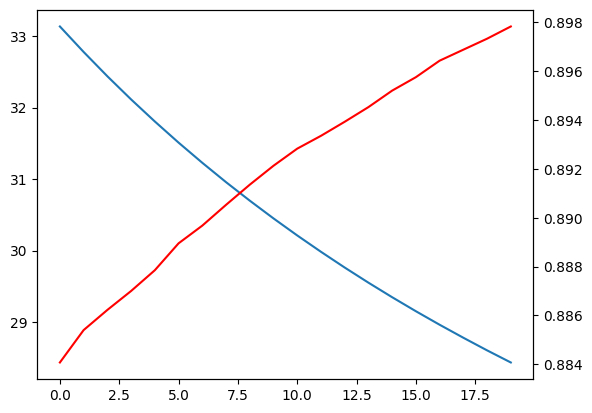

In [19]:
from matplotlib import pyplot as plt
param=Namespace(
    lr            = 1e-4,
    epoch         = 20,  
)

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total



Model.to(device,non_blocking=True)
print(next(Model.parameters()).device)
optimizer = torch.optim.SGD(Model.parameters(), lr=param.lr)
loss_function = nn.CrossEntropyLoss()

loss_list=[]
acc_list=[]

print("start_train")

for epoch in range(param.epoch):
    ls=0
    for i in range(len(train_inputs)): 
        inputi  = train_inputs[i]
        label  = train_lables[i]
        output = Model(inputi)
        loss   = loss_function(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls+=loss
        
    print(f"epoch{epoch} loss:{loss}")
    
    acci=acc(Model)
    print(f"epoch{epoch} acc:{acci}")
    acc_list.append(acci)
    loss_list.append(ls)


y1=plt.subplot()
loss_list=[i.cpu().detach().numpy() for i in loss_list]

y1.plot(range(param.epoch),loss_list,label='loss')

y2=y1.twinx()
y2.plot(range(param.epoch),acc_list,label='acc',color='r')

plt.show()


In [ ]:
torch.save(Model,'./conv.pth')